**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2022*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import missingno as msno


import seaborn as sns
sns.set_context('talk')

from sqlalchemy import create_engine, text

In [4]:
import plotly
plotly.__version__
# Make sure it's 4.14.3

'5.6.0'

In [26]:
melb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [27]:
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude',
]
airbnb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols)

/tmp/ipykernel_1650294/750777605.py:7: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb_df = pd.read_csv(


## Ejercicio 1 SQL: 

1. Crear una base de datos en SQLite utilizando la libreria [SQLalchemy](https://stackoverflow.com/questions/2268050/execute-sql-from-file-in-sqlalchemy).
https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite

2. Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.

3. Implementar consultas en SQL que respondan con la siguiente información:

    - cantidad de registros totales por ciudad.
    - cantidad de registros totales por barrio y ciudad.

4. Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL  para obtener un resultado similar a lo realizado con Pandas en clase.  



In [7]:
engine = create_engine('sqlite:///grupo11.db')

In [6]:
import sqlite3
my_conn = sqlite3.connect('grupo11.db')
print("Connected to database successfully")

Connected to database successfully


In [7]:
query = melb_df.to_sql("melb_df", my_conn, if_exists="replace")
query

13580

In [ ]:
##push the dataframe to sql 
melb_df.to_sql("melb_df", my_conn, if_exists="replace")

##create the table

my_conn.execute(
    """
    create table melb_df as 
    select * from query
    """)

In [ ]:
##push the dataframe to sql 
query_airbnb = airbnb_df.to_sql("airbnb_df", my_conn, if_exists="replace")

##create the table

my_conn.execute(
    """
    create table airbnb_df as 
    select * from query_airbnb
    """)

In [ ]:
melb_df.head()

In [ ]:
melb_df.Regionname.value_counts()

In [ ]:
melb_df.columns

In [ ]:
r_set=my_conn.execute('''SELECT "Suburb", count("Suburb") as "Cantidad" from melb_df
                        group by "Suburb"
                        order by "Cantidad" DESC''');
for row in r_set:
    print(row)

In [ ]:
r_set=my_conn.execute('''SELECT "Regionname","Suburb", count(*) from melb_df
                        group by "Suburb", "Regionname"
                        ''');
for row in r_set:
    print(row)

In [ ]:
r_set=my_conn.execute('''SELECT * from melb_df
                        ''');
for row in r_set:
    print(row)


## Ejercicio 2: 

1. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.
 - Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.

In [28]:
melb_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [50]:
melb_df.describe().round()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.0,13580.0,13580.0,13580.0,13580.0,13580.0,13518.0,13580.0,7130.0,8205.0,13580.0,13580.0,13580.0
mean,3.0,1075684.0,10.0,3105.0,3.0,2.0,2.0,558.0,152.0,1965.0,-38.0,145.0,7454.0
std,1.0,639311.0,6.0,91.0,1.0,1.0,1.0,3991.0,541.0,37.0,0.0,0.0,4379.0
min,1.0,85000.0,0.0,3000.0,0.0,0.0,0.0,0.0,0.0,1196.0,-38.0,144.0,249.0
25%,2.0,650000.0,6.0,3044.0,2.0,1.0,1.0,177.0,93.0,1940.0,-38.0,145.0,4380.0
50%,3.0,903000.0,9.0,3084.0,3.0,1.0,2.0,440.0,126.0,1970.0,-38.0,145.0,6555.0
75%,3.0,1330000.0,13.0,3148.0,3.0,2.0,2.0,651.0,174.0,1999.0,-38.0,145.0,10331.0
max,10.0,9000000.0,48.0,3977.0,20.0,8.0,10.0,433014.0,44515.0,2018.0,-37.0,146.0,21650.0


Dado que vemos valores máximos que se alejan mucho del percentil 75 y de la desviación estándar, decidimos profundizar el análisis en las columnas "Landsize" y "BuildingArea". Lo mismo ocurre con el valor mínimo de "YearBuilt"

In [30]:
melb_df.sort_values(by=['Landsize'], ascending=False).head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
11020,Fitzroy,389 Gore St,3,h,2700000.0,VB,Kay,12/08/2017,2.1,3065.0,...,3.0,1.0,433014.0,NaN,NaN,Yarra,-37.79751,144.98309,Northern Metropolitan,5825.0
10504,Silvan,16 Eleanor Dr,3,h,1085000.0,S,Harcourts,27/05/2017,34.6,3795.0,...,2.0,2.0,76000.0,NaN,NaN,Yarra Ranges,-37.84739,145.47052,Eastern Victoria,457.0
687,Balwyn North,9 Gildan St,3,h,2000000.0,VB,Kay,28/08/2016,9.2,3104.0,...,1.0,2.0,75100.0,NaN,NaN,Boroondara,-37.80020,145.07000,Southern Metropolitan,7809.0
13245,New Gisborne,71 Hamilton Rd,5,h,1355000.0,S,Raine,23/09/2017,48.1,3438.0,...,3.0,5.0,44500.0,44515.0,NaN,NaN,-37.45392,144.58864,Northern Victoria,849.0
5194,Reservoir,14 Beenak St,3,h,572000.0,S,Ray,23/04/2016,11.2,3073.0,...,1.0,2.0,41400.0,NaN,NaN,Darebin,-37.71040,145.02570,Northern Metropolitan,21650.0


In [31]:
melb_df.sort_values(by=['BuildingArea'], ascending=False).head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13245,New Gisborne,71 Hamilton Rd,5,h,1355000.0,S,Raine,23/09/2017,48.1,3438.0,...,3.0,5.0,44500.0,44515.0,NaN,NaN,-37.45392,144.58864,Northern Victoria,849.0
1484,Bulleen,19 Warringal St,4,h,1280000.0,S,Barry,11/03/2017,11.8,3105.0,...,1.0,2.0,732.0,6791.0,NaN,Manningham,-37.76150,145.08970,Eastern Metropolitan,4480.0
2560,Fitzroy North,186 Queens Pde,2,t,930000.0,S,Nelson,3/09/2016,3.5,3068.0,...,3.0,0.0,2778.0,3558.0,NaN,Yarra,-37.79030,144.98590,Northern Metropolitan,6244.0
1588,Camberwell,46 Athelstan Rd,5,h,2608000.0,S,Marshall,15/10/2016,7.8,3124.0,...,2.0,4.0,730.0,3112.0,1920.0,Boroondara,-37.84240,145.06390,Southern Metropolitan,8920.0
2234,Elsternwick,5/16 St Georges Rd,2,u,741000.0,S,Biggin,16/04/2016,8.5,3185.0,...,1.0,1.0,0.0,1561.0,1966.0,Glen Eira,-37.88290,145.00330,Southern Metropolitan,4898.0


In [32]:
melb_df.sort_values(by=['YearBuilt'], ascending=True).head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
9968,Mount Waverley,5 Armstrong St,3,h,1200000.0,VB,McGrath,24/06/2017,14.2,3149.0,...,1.0,4.0,807.0,117.0,1196.0,Monash,-37.86788,145.12121,Eastern Metropolitan,13366.0
2079,Collingwood,2/79 Oxford St,2,u,855000.0,S,Nelson,3/09/2016,1.6,3066.0,...,1.0,1.0,2886.0,122.0,1830.0,Yarra,-37.80420,144.98450,Northern Metropolitan,4553.0
5860,St Kilda,51/167 Fitzroy St,3,u,1600000.0,PI,Kay,25/02/2017,6.1,3182.0,...,2.0,2.0,0.0,3.0,1850.0,Port Phillip,-37.85840,144.98020,Southern Metropolitan,13240.0
4843,Prahran,602/220 Commercial Rd,2,u,841000.0,S,hockingstuart,18/03/2017,4.5,3181.0,...,2.0,1.0,0.0,101.0,1850.0,Stonnington,-37.84700,144.99360,Southern Metropolitan,7717.0
2554,Fitzroy,11 Henry St,2,h,677000.0,S,Chambers,27/11/2016,1.6,3065.0,...,1.0,0.0,67.0,NaN,1850.0,Yarra,-37.79690,144.97590,Northern Metropolitan,5825.0


Claramente los valores atípicos son pocos y difieren mucho del resto y por ende decidimos eliminarlos para evitar distorsiones en el análisis, por lo que procedemos a eliminarlos y generamos un nuevo df.

In [66]:
melb_cleaned = melb_df.drop(index=[9968,11020,13245])

In [67]:
melb_cleaned[melb_cleaned.YearBuilt < 1900].shape

(367, 21)

Encontramos en la variable YearBuilt valores menores a 1900, lo cual nos da una pauta de que pueden ser valores atípicos. Son solo 367 valores, lo que representa un 2% del total del dataset, por lo que si los quitamos, no influirá en el futuro análisis y nos aseguramos de que tenemos el dataset limpio.

In [68]:
melb_cleaned.shape

(13577, 21)

In [74]:
menor_1900 = melb_cleaned[melb_cleaned.YearBuilt < 1900].index

In [76]:
melb_cleaned = melb_cleaned.drop(menor_1900)
melb_cleaned.shape

(13210, 21)

In [34]:
melb_cleaned.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [35]:
melb_cleaned.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

<AxesSubplot:>

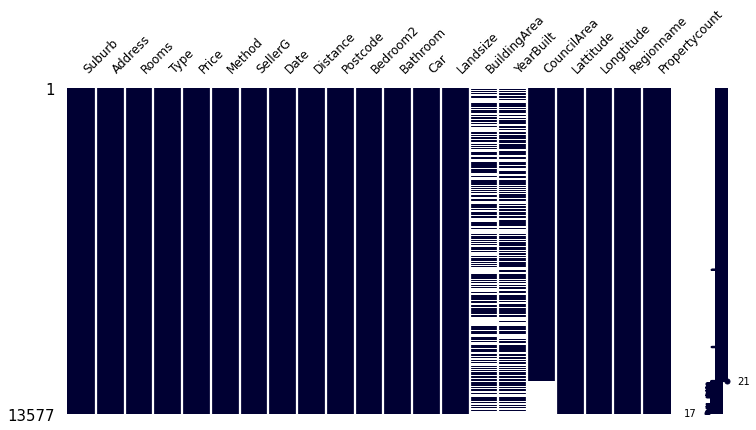

In [36]:
msno.matrix(melb_cleaned,figsize=(12, 6), fontsize=12, color=[0,0,0.2])


En primer lugar analizamos los valores nulos, graficando su presencia en las distintas columnas.

Luego decidimos separar las variables numéricas de las categóricas.

En el caso de las variables numéricas es importante ver la correlación entre las distintas variables por dos razones:

Para detectar variables redundantes (porque tienen valores con comportamientos muy similares a otra)
Para detectar cuáles influyen de mayor manera en el precio

<AxesSubplot:>

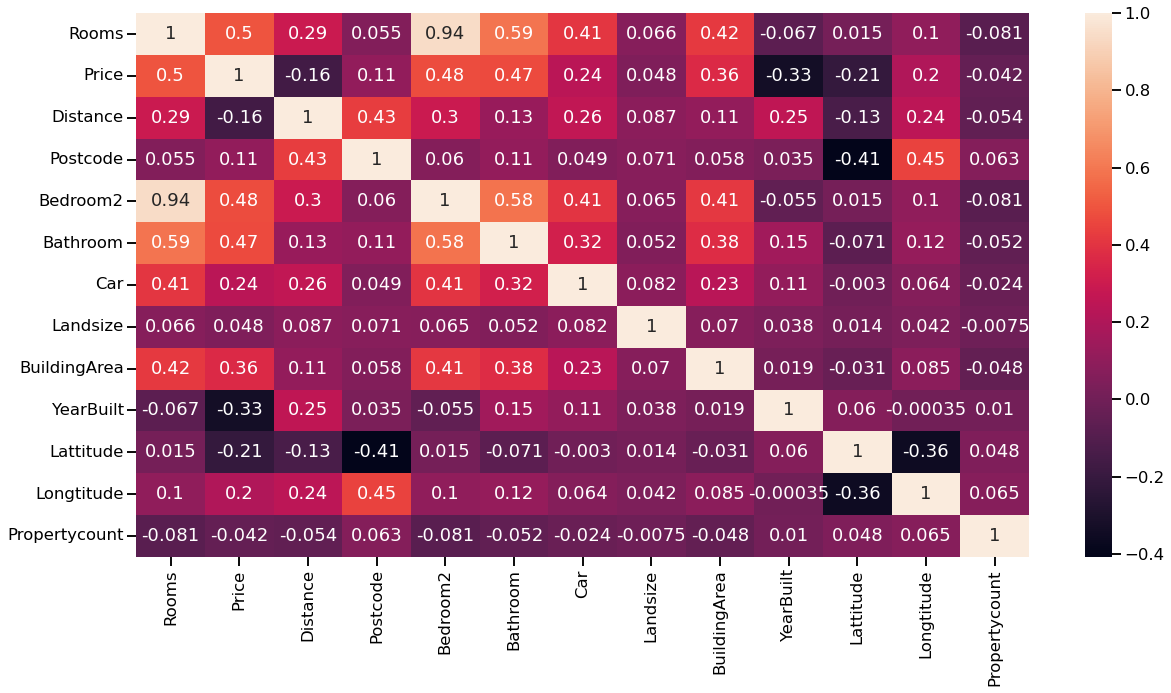

In [37]:
plt.figure(figsize=(20, 10))
sns.heatmap(melb_cleaned.corr(method='pearson'), annot = True)

In [38]:
cuartos = ['Rooms', 'Bedroom2', 'Price']
melb_cleaned[cuartos].corr()

,Rooms,Bedroom2,Price
Rooms,1.000000,0.944171,0.496759
Bedroom2,0.944171,1.000000,0.476063
Price,0.496759,0.476063,1.000000


In [39]:
melb_cleaned[cuartos].describe().round()

,Rooms,Bedroom2,Price
count,13577.0,13577.0,13577.0
mean,3.0,3.0,1075535.0
std,1.0,1.0,639224.0
min,1.0,0.0,85000.0
25%,2.0,2.0,650000.0
50%,3.0,3.0,903000.0
75%,3.0,3.0,1330000.0
max,10.0,20.0,9000000.0


Las variables "Rooms" y "Bedroom2" tienen una alta correlación, ya que corresponden a una misma variable pero obtenidas de diferentes fuentes. Observando la distribución de los datos, vemos que la variable "Rooms" parece ser más consistente, ya que contiene valores entre 1 y 10, en cambio si vemos la variable "Bedroom2" contiene valores entre 0 y 20, por lo cual podemos identificar que tiene outliers. Por otro lado, si vemos la correlación entre las variables y el precio de la vivienda, vemos que "Rooms" tiene una mayor correlación, por lo que vamos a proceder a quedarnos con la variable "Rooms" para avanzar con el análisis. 

In [40]:
for column in melb_cleaned.select_dtypes(include='object').columns:
    print('En la columna {} hay {} valores distintos'.format(column, len(melb_cleaned[column].unique())))

En la columna Suburb hay 313 valores distintos
En la columna Address hay 13375 valores distintos
En la columna Type hay 3 valores distintos
En la columna Method hay 5 valores distintos
En la columna SellerG hay 268 valores distintos
En la columna Date hay 58 valores distintos
En la columna CouncilArea hay 34 valores distintos
En la columna Regionname hay 8 valores distintos


Las variables "Rooms" y "Bedroom2" tienen una alta correlación, ya que corresponden a una misma variable pero obtenidas de diferentes fuentes. Observando la distribución de los datos, vemos que la variable "Rooms" parece ser más consistente, ya que contiene valores entre 1 y 10, en cambio si vemos la variable "Bedroom2" contiene valores entre 0 y 20, por lo cual podemos identificar que tiene outliers. Por otro lado, si vemos la correlación entre las variables y el precio de la vivienda, vemos que "Rooms" tiene una mayor correlación, por lo que vamos a proceder a quedarnos con la variable "Rooms" para avanzar con el análisis.
También decidimos eliminar las columnas Landsize y PropertyCount debido a que tienen una correlación con el precio cercana a 0.
Para las variables categóricas decidimos eliminar a aquellas que tienen una gran variedad de valores únicos como Address y SellerG, ya que se dificulta encontrar patrones claros con tantas categorías dentro de la misma variable. Otra variable a quitar es Date, ya que entendemos que no es relevante para el caso de uso que estamos analizando.

In [41]:
melb_cleaned = melb_cleaned.drop(['Bedroom2', 'Landsize', 'Propertycount', 'Address', 'SellerG', 'Date'], axis=1)

In [42]:
melb_cleaned.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'Distance', 'Postcode',
       'Bathroom', 'Car', 'BuildingArea', 'YearBuilt', 'CouncilArea',
       'Lattitude', 'Longtitude', 'Regionname'],
      dtype='object')

Para las variables categóricas decidimos eliminar a aquellas que tienen una gran variedad de valores únicos como Address y SellerG, ya que se dificulta encontrar patrones claros con tantas categorías dentro de la misma variable. Otra variable a quitar es Date, ya que entendemos que no es relevante para el caso de uso que estamos analizando.

In [43]:
columnas = ['price', 'zipcode']
grouped_airbnb_df = airbnb_df[columnas].groupby(['zipcode']).agg({'price': ['mean', 'count']}).reset_index()
grouped_airbnb_df.columns = [
' '.join(col).strip()
  for col in grouped_airbnb_df.columns.values]
grouped_airbnb_df = grouped_airbnb_df.rename(columns={'price mean': 'airbnb_price_mean',
                                                     'price count': 'airbnb_price_count'})
grouped_airbnb_df

,zipcode,airbnb_price_mean,airbnb_price_count
0,2010.0,40.000000,1
1,2134.0,50.000000,1
2,2582.0,104.000000,1
3,3000.0,149.236050,2491
4,3001.0,120.000000,1
...,...,...,...
458,3977,79.105263,19
459,3978,197.250000,4
460,3980,60.000000,1
461,VIC,150.000000,1


In [44]:
melb_cleaned.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'Distance', 'Postcode',
       'Bathroom', 'Car', 'BuildingArea', 'YearBuilt', 'CouncilArea',
       'Lattitude', 'Longtitude', 'Regionname'],
      dtype='object')

In [45]:
melb_cleaned.Postcode.describe()

count    13577.000000
mean      3105.277160
std         90.640579
min       3000.000000
25%       3044.000000
50%       3084.000000
75%       3148.000000
max       3977.000000
Name: Postcode, dtype: float64

In [46]:
grouped_airbnb_df['zipcode'] = pd.to_numeric(grouped_airbnb_df.zipcode, errors='coerce')
melb_cleaned['Postcode'] = pd.to_numeric(melb_cleaned.Postcode, errors='ignore')

In [47]:
melb_df_merged = melb_cleaned.merge(grouped_airbnb_df, left_on = 'Postcode', right_on = 'zipcode', how='left')

In [48]:
melb_df_merged

,Suburb,Rooms,Type,Price,Method,Distance,Postcode,Bathroom,Car,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,zipcode,airbnb_price_mean,airbnb_price_count
0,Abbotsford,2,h,1480000.0,S,2.5,3067.0,1.0,1.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,3067.0,140.292994,157.0
1,Abbotsford,2,h,1480000.0,S,2.5,3067.0,1.0,1.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,3067.0,115.594059,101.0
2,Abbotsford,2,h,1035000.0,S,2.5,3067.0,1.0,0.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,3067.0,140.292994,157.0
3,Abbotsford,2,h,1035000.0,S,2.5,3067.0,1.0,0.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,3067.0,115.594059,101.0
4,Abbotsford,3,h,1465000.0,SP,2.5,3067.0,2.0,0.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,3067.0,140.292994,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26861,Williamstown,3,h,1170000.0,S,6.8,3016.0,2.0,4.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,3016.0,167.200000,20.0
26862,Williamstown,4,h,2500000.0,PI,6.8,3016.0,1.0,5.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,3016.0,199.944444,54.0
26863,Williamstown,4,h,2500000.0,PI,6.8,3016.0,1.0,5.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,3016.0,167.200000,20.0
26864,Yarraville,4,h,1285000.0,SP,6.3,3013.0,1.0,1.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,3013.0,127.523810,42.0


La unión entre los dos DataFrame se podría haber hecho también usando las columnas de "Neighborhood" y "Suburb". Sin embargo, vemos que en el DataFrame de Airbnb hay veces que los valores en esas columnas son iguales, por lo que la unión perdería precisión en comparación con la que se hace usando el código postal.

## Ejercicio 3:

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

In [49]:
melb_df_merged.to_csv('melb_df_merged.csv', index=False)